<a href="https://colab.research.google.com/github/blackcube313/HR_Attrition/blob/main/HR_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project to see how many people will stay with the company and how many will leave.


In [1]:
# Install specific libraries
!pip install pycaret
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 29.0 MB/s 
     |████████████████████████████████| 88 kB 9.9 MB/s 
     |████████████████████████████████| 25.9 MB 1.4 MB/s 
     |████████████████████████████████| 6.8 MB 51.2 MB/s 
     |████████████████████████████████| 2.0 MB 56.3 MB/s 
     |████████████████████████████████| 636 kB 68.6 MB/s 
     |████████████████████████████████| 167 kB 72.8 MB/s 
     |████████████████████████████████| 137 kB 67.4 MB/s 
     |████████████████████████████████| 1.7 MB 54.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 16.9 MB 60.3 MB/s 
     |████████████████████████████████| 10.4 MB 59.2 MB/s 
     |████████████████████████████████| 3.3 MB 3.3 MB/s 
     |███████████████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Getting error, so getting a specific version on NumPy to resolve it

In [9]:
!pip install NumPy==1.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Make sure pycaret knows we are in colab
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [5]:
# Load in the data
import pandas as pd
dataset = pd.read_csv('ibm_hr.csv')

In [6]:
# spilt into test and train data
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1396, 35)
Unseen Data For Predictions: (74, 35)


In [7]:
data['Attrition'].value_counts() / len(data)

No     0.838109
Yes    0.161891
Name: Attrition, dtype: float64

If we say everyone stays in the company we will be right 83% of time.

So we need a model that is better then 83%

In [10]:
from pycaret.classification import *
exp_clf101 = setup(data = data, target = 'Attrition', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(1396, 35)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,25
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Attrition',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

This is the best line of code!

It just compares all the models and gives reults in tabular form.

Ta Daa!!

In [11]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8710,0.8304,0.5451,0.6699,0.5936,0.5187,0.5269,0.032
ridge,Ridge Classifier,0.8690,0.0000,0.4180,0.7285,0.5234,0.4550,0.4821,0.012
lightgbm,Light Gradient Boosting Machine,0.8649,0.8204,0.3307,0.7883,0.4546,0.3938,0.4468,0.118
lr,Logistic Regression,0.8629,0.8160,0.3935,0.7099,0.4889,0.4206,0.4516,0.441
gbc,Gradient Boosting Classifier,0.8608,0.8367,0.3601,0.7130,0.4650,0.3979,0.4338,0.272
ada,Ada Boost Classifier,0.8536,0.7853,0.4301,0.6345,0.5069,0.4253,0.4392,0.111
et,Extra Trees Classifier,0.8475,0.8230,0.1683,0.8400,0.2751,0.2313,0.3275,0.442
rf,Random Forest Classifier,0.8414,0.8099,0.1219,0.8667,0.2097,0.1744,0.2810,0.463
dummy,Dummy Classifier,0.8240,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.008
knn,K Neighbors Classifier,0.7984,0.5827,0.0935,0.2729,0.1374,0.0565,0.0662,0.118


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


We can hyperparameter tune these and get even better results

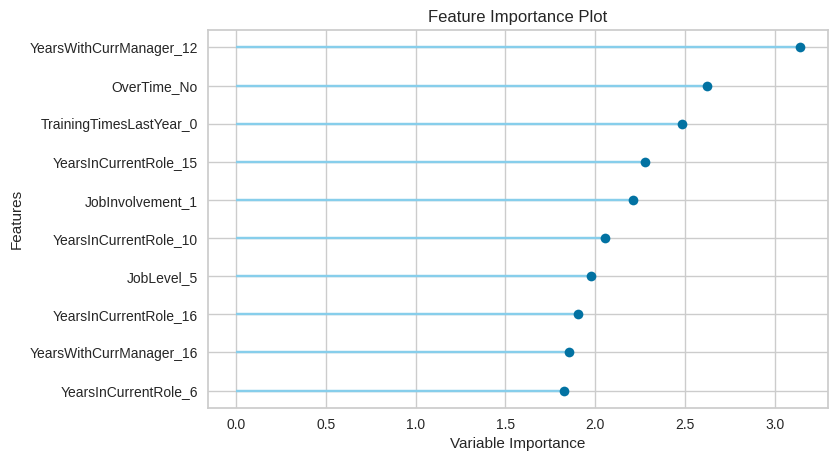

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [12]:
model = create_model('lda')
plot_model(model, plot='feature')

We get the most important features and cummunicate the results with HR on how to reduce attrition.

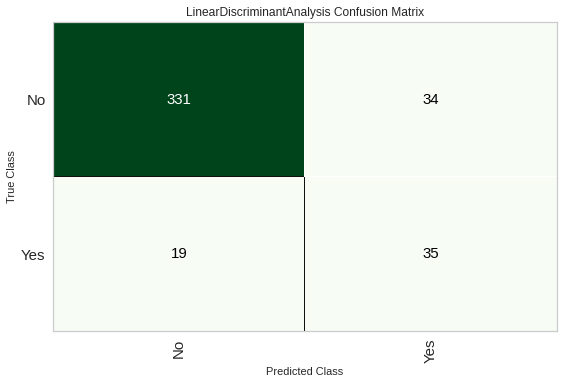

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [13]:
plot_model(model, plot = 'confusion_matrix')

In [14]:
unseen_predictions = predict_model(model, data=data_unseen)
from pycaret.utils import check_metric
check_metric(unseen_predictions['Attrition'], unseen_predictions['Label'], metric = 'Accuracy')

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0,0.6984,0,0,0,0,0


0.8784